# Airbnb Data Cleaning and Exploratory Data Analysis
## Step 1: Import Libraries

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Enable inline plotting
%matplotlib inline

* This notebook contains exploratory data analysis and cleaning of the NYC Airbnb dataset. It is meant to clean the data for an interactive dashboard and comprehend key trends.
* Airbnb Dataset - Exploratory Data Analysis (EDA) This notebook performs exploratory data analysis (EDA) on the Airbnb listings data to identify data quality issues, trends, and patterns. It will help create a useful and interactive dashboard.

## Step 2: Load the Dataset


In [2]:
df = pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,225,30,48,2019-11-04,0.31,3,308,0,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.32,2,365,0,NaN
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,2,2021-08-08,0.02,1,250,1,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,536,2022-05-09,3.37,1,172,62,NaN
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.76,1,0,0,NaN


This dataset contains Airbnb listings data for New York City. It was downloaded from Inside Airbnb and widely used for data analysis and data visualization work.
Each row represents a unique Airbnb listing, with features that describe:
* Listing details (name, host id, host name)
* Geographical data (latitude, longitude, neighbourhood)
* Property characteristics (room type, number of minimum nights, availability)
* Financial data (price, number of reviews, last review date)

## Step 3: Understanding the Data



In [3]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37410 non-null  int64  
 1   name                            37396 non-null  object 
 2   host_id                         37410 non-null  int64  
 3   host_name                       37344 non-null  object 
 4   neighbourhood_group             37410 non-null  object 
 5   neighbourhood                   37410 non-null  object 
 6   latitude                        37410 non-null  float64
 7   longitude                       37410 non-null  float64
 8   room_type                       37410 non-null  object 
 9   price                           37410 non-null  int64  
 10  minimum_nights                  37410 non-null  int64  
 11  number_of_reviews               37410 non-null  int64  
 12  last_review                     

license                           37406
reviews_per_month                  7949
last_review                        7949
host_name                            66
name                                 14
id                                    0
latitude                              0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
price                                 0
room_type                             0
longitude                             0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

Prior to visualizations, the overall structure and quality of the dataset need to be checked. This step involves:
### Summary of Dataset Structure and Quality

- The `df.info()` output reveals the overall structure of the dataset, including column names, data types, and the number of non-null entries. This helps identify columns that may require type conversion or contain missing data.

- The `df.describe()` output provides key summary statistics for numerical columns. Notably, columns like `price` and `number_of_reviews` have large standard deviations, indicating potential outliers and a wide range of values.

- The missing value check using `df.isnull().sum()` shows that some columns, such as `reviews_per_month` and `last_review`, have missing entries. These will need to be addressed through imputation or removal depending on their importance to the analysis.

# Step 4: Select Relevant Columns


In [4]:
cols_to_keep = [
    'id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude', 'longitude',
    'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365'
]

df = df[cols_to_keep]
df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,40.75356,-73.98559,Entire home/apt,225,30,48,2019-11-04,0.31,3,308
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.32,2,365
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,40.66265,-73.99454,Entire home/apt,275,21,2,2021-08-08,0.02,1,250
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,40.76457,-73.98317,Private room,68,2,536,2022-05-09,3.37,1,172
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.76,1,0


* For the ease of analysis, only columns that were essential were retained. They contain location data, price, availability, review metrics, and host information. The removal of redundant or irrelevant columns prevents noise and makes visualizations and clarity in insight better.

# Step 5: Clean 'price' column (remove $ and convert to float)

In [5]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,40.75356,-73.98559,Entire home/apt,225.0,30,48,2019-11-04,0.31,3,308
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,40.68535,-73.95512,Private room,60.0,30,50,2019-12-02,0.32,2,365
2,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,40.66265,-73.99454,Entire home/apt,275.0,21,2,2021-08-08,0.02,1,250
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,40.76457,-73.98317,Private room,68.0,2,536,2022-05-09,3.37,1,172
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,40.80380,-73.96751,Private room,75.0,2,118,2017-07-21,0.76,1,0


* The `price` column had the dollar signs and commas originally and were stored as strings. Those were removed through the use of regular expressions, and the column was also converted to float type in order to facilitate numerical visualization and analysis.

# Step 6: Convert 'last_review' to datetime


In [6]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

* The `last_review` column was originally stored as a string. It is transformed into datetime format through the application of `pd.to_datetime()`, allowing date-based operations. Invalid entries, if any, are handled with `errors='coerce'`, which converts them to `NaT` (Not a Time).

# Step 7: Handling Missing Values


In [7]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['host_name'] = df['host_name'].fillna("Unknown")
df['name'] = df['name'].fillna("Unnamed")

In [8]:
df['room_type'].value_counts()

room_type
Entire home/apt    21094
Private room       15603
Shared room          518
Hotel room           195
Name: count, dtype: int64

Missing values in key columns were filled with appropriate defaults to maintain data integrity:
- `reviews_per_month` was filled with 0, assuming no reviews where data is missing.
- `host_name` was filled with "Unknown" to preserve host identity without dropping rows.
- `name` was filled with "Unnamed" to avoid issues in display or filtering.

This ensures the dataset remains usable without unnecessarily dropping valuable records.


# Step 8: Export Cleaned Dataset


In [9]:
df.to_csv('cleaned_listings.csv', index=False)
print("Cleaned dataset saved.")

Cleaned dataset saved.


Here Saving the cleaned data after data cleaning and initial exploration, Saving the cleaned dataset as a new CSV file for future use in our interactive dashboard.

# Step 9: EDA Visualizations

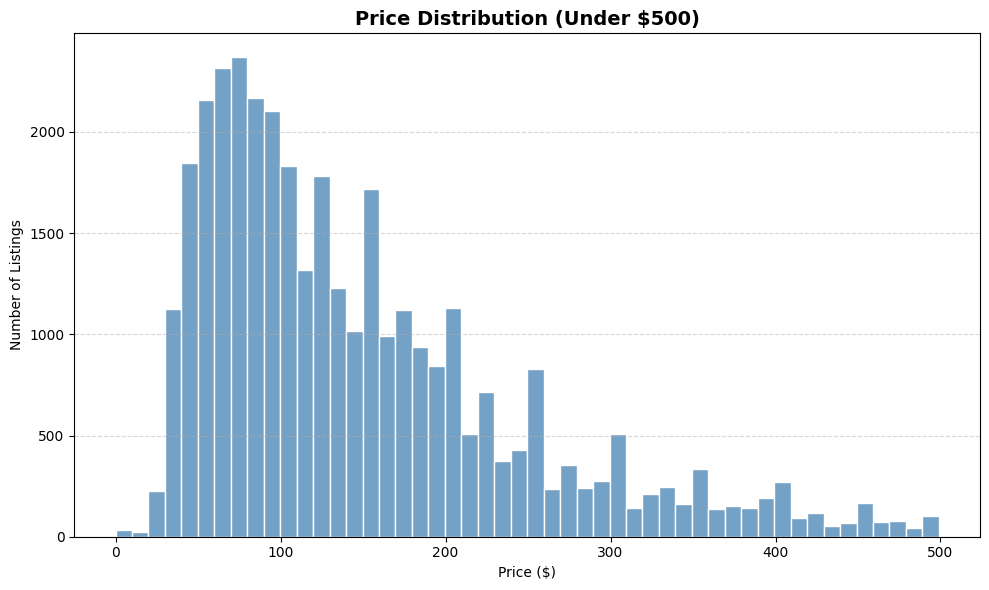

In [10]:
# 1.Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 500]['price'], bins=50, color='steelblue', edgecolor='white')
plt.title("Price Distribution (Under $500)", fontsize=14, fontweight='bold')
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Price Distribution (Clipped at $500)

* This histogram displays the distribution of listing prices, **capped at $500** to remove extreme outliers and improve readability.
* Most listings fall under the **$200–$300 range**, indicating a **right-skewed distribution**.
* This insight helps guide **pricing strategies** and **filter design** in the dashboard.



# Plot 2: Average number of reviews by room type

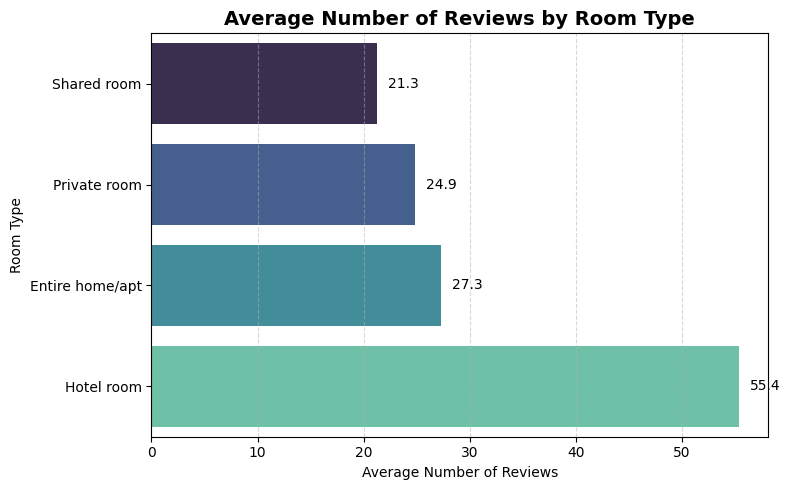

In [11]:
review_room_df = df.groupby('room_type')['number_of_reviews'].mean().sort_values().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=review_room_df,
    x='number_of_reviews',
    y='room_type',
    hue='room_type',
    palette='mako',
    dodge=False,
    legend=False
)
for index, value in enumerate(review_room_df['number_of_reviews']):
    plt.text(value + 1, index, f"{value:.1f}", va='center')
plt.title("Average Number of Reviews by Room Type", fontsize=14, fontweight='bold')
plt.xlabel("Average Number of Reviews")
plt.ylabel("Room Type")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Average Number of Reviews by Room Type

* This bar chart displays the **average number of reviews** received by each room type.
* From the plot, we can observe that **shared rooms** tend to receive more reviews on average, while **entire homes/apartments** receive fewer.
* This may reflect differences in **affordability**, **popularity**, or **user expectations** across room types.


# Plot 3:  Correlation Heatmap of Numeric Features

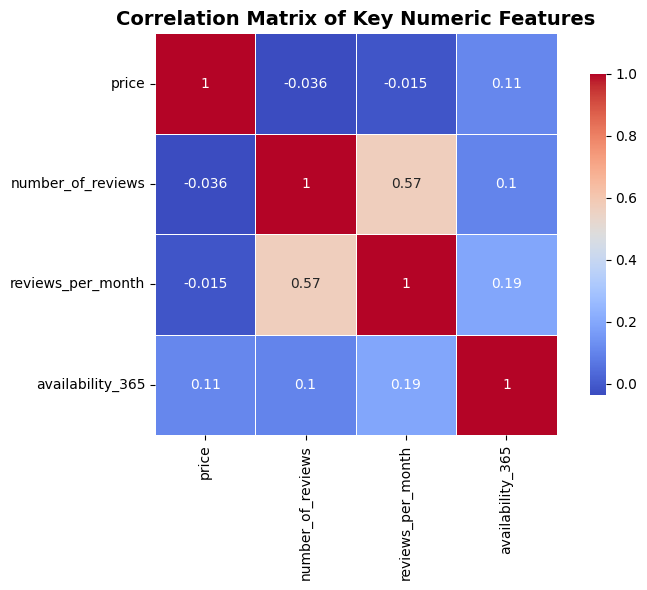

In [12]:
# 📊 3. Correlation Heatmap of Numeric Features
plt.figure(figsize=(8, 6))
corr = df[['price', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Key Numeric Features", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Important Numeric Feature Correlation Matrix

* This **heatmap** shows the correlation between significant numeric features, including `price`, `number_of_reviews`, `reviews_per_month`, and `availability_365`.
* The strongest **positive correlation** is between `number_of_reviews` and `reviews_per_month`, as expected.
* There is **no or extremely weak correlation** between `price` and the other variables, suggesting that **price** is not strongly dependent on the **number of reviews** or **availability**.


# Plot 4: Price vs Number of Reviews by Room Type

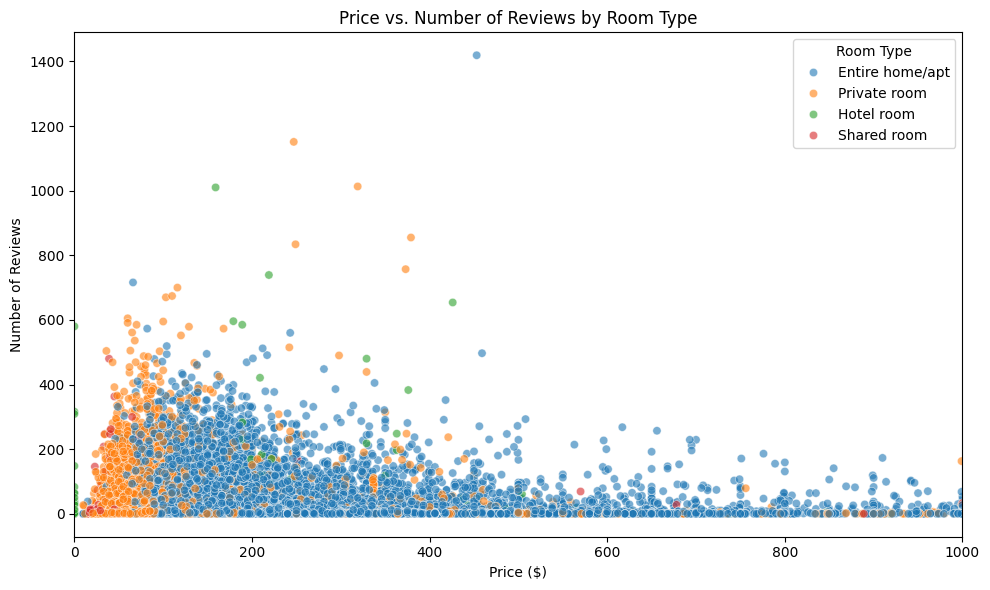

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='number_of_reviews', hue='room_type', alpha=0.6)
plt.xlim(0, 1000)  # Remove outliers
plt.title("Price vs. Number of Reviews by Room Type")
plt.xlabel("Price ($)")
plt.ylabel("Number of Reviews")
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

### Price vs. Number of Reviews by Room Type

* This **scatter plot** illustrates the relationship between **price** and **number of reviews** across different **room types**.
* Most listings with a high number of reviews are priced **below $300**, especially for **private rooms**.
* This suggests that **popularity** and **affordability** are closely linked, particularly for **budget-conscious users**.
